<a href="https://colab.research.google.com/github/Priyankapawar1224/Decision-Tree/blob/main/logisitic_regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

FILE_PATH = "WA_Fn-UseC_-HR-Employee-Attrition (1).csv"

try:
    df = pd.read_csv(FILE_PATH)
    print(f"Data Loaded Successfully. Shape = {df.shape}")
except FileNotFoundError:
    print("File NOT found! Upload the file to Colab runtime first.")

df.head()


Data Loaded Successfully. Shape = (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:


# Drop useless or constant columns
df = df.drop(columns=['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], errors='ignore')

# Encode Attrition 'Yes'/'No' → 1/0
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])

print("Target column Attrition encoded (Yes=1, No=0).")
print(df['Attrition'].value_counts())

# Split into X and y
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

print("Shape after encoding:", X.shape)


Target column Attrition encoded (Yes=1, No=0).
Attrition
0    1233
1     237
Name: count, dtype: int64
Shape after encoding: (1470, 44)


In [5]:
# Train-Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (1029, 44)
Test size: (441, 44)


In [6]:

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', max_iter=1000, class_weight='balanced')

model.fit(X_train, y_train)

print("Model training complete.")


Model training complete.


In [7]:


y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Predictions done.")


Predictions done.


Accuracy: 0.7687
Precision: 0.3798
Recall: 0.6901
ROC AUC: 0.8153

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.78      0.85       370
           1       0.38      0.69      0.49        71

    accuracy                           0.77       441
   macro avg       0.65      0.74      0.67       441
weighted avg       0.84      0.77      0.79       441


Confusion Matrix:
 [[290  80]
 [ 22  49]]


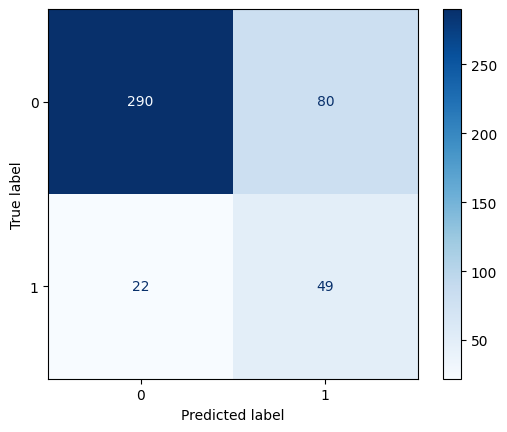

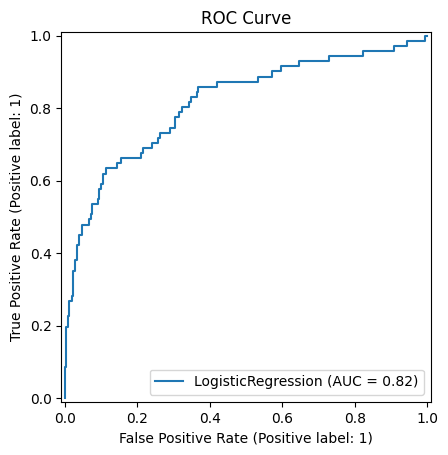

In [8]:


from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    confusion_matrix, classification_report,
    ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score
)
import matplotlib.pyplot as plt

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve")
plt.show()


In [9]:


import pandas as pd

coeff = pd.Series(model.coef_[0], index=X.columns)

print("\nTop 5 Positive Features (Increase Attrition):")
print(coeff.nlargest(5))

print("\nTop 5 Negative Features (Decrease Attrition):")
print(coeff.nsmallest(5))



Top 5 Positive Features (Increase Attrition):
OverTime_Yes                        1.674712
BusinessTravel_Travel_Frequently    1.578111
JobRole_Laboratory Technician       1.317156
MaritalStatus_Single                1.043743
JobRole_Sales Representative        1.011628
dtype: float64

Top 5 Negative Features (Decrease Attrition):
EducationField_Other                -0.620866
JobRole_Research Director           -0.559674
JobSatisfaction                     -0.330234
JobInvolvement                      -0.315523
Department_Research & Development   -0.301074
dtype: float64
